## Astronomy 534 "Extragalactic Universe" (Winter 2025)

## Homework 1

#### Name: Vaishnav Rao

#### available: Friday January 10

#### due: Friday January 24

Please upload your solution to Canvas as Jupyter Notebook (`.pynb` format). It should contain all your code and plots. You can digitize your hand-written solution and include it as images (`.png` format) if needed. Please make sure it is clear to read.

### Criteria for success

* Solution is correct, as a functional dependence and numerical value (50% of points).

* Intermediate steps of derivations are clearly shown, blocks of code are documented with markdown cells that explain what the code does (30% of points).

* Plots are _paper quality_ (20% of points): with clear axis labels, font, legends for lines. The range of $x$ and $y$ axes should be appropriate for plotted values, without large blocks of empty space.

You may discuss how to approach the problems with other students and the instructor, but all code, derivations, and write-up must be your own.

### Background

General Theory of Relativity unites energy and matter through the famous equation $E = mc^2$. Since the universe may be infinite in space, it is more practical to consider the density of energy and matter, in a large enough volume to contain all typical structure. The main components of the energy/matter density are: non-relativistic matter (baryons, leptons, dark matter), relativistic matter ("radiation": photons, neutrinos), and dark energy. These densities change with cosmic time $t$, or equivalently, redshift $z$ or expansion factor $a$. Each of these three energy/matter types changes differently, depending on their equation of state. Combined, they determine the rate of the expansion of the universe, which in turn controls the current age of the universe and the cosmological distances.


### Learning goals

* Understand the evolution of the main types of the energy density in the universe.


* Determine the epochs when each type dominates.


* Be able to calculate the relation between the expansion factor, redshift, and time.


* Be able to calculate the age of the universe as a function of cosmological parameters.


* Be able to calculate the cosmological distances.

### Task

__Problem 1.__ (20 points)

Integrate the Friedmann equation for a spatially-flat universe ($K=0$) to derive __analytically__ the expansion factor $a(t)$ as a function of cosmic time $t$, for the following choices of the present matter density parameter $\Omega_{m0}\,$, radiation density parameter $\Omega_{r0}\,$, and cosmological constant $\Omega_\Lambda\,$:

__a.__ $\Omega_{r0}=1$, $\Omega_{m0} = \Omega_\Lambda = 0$

__b.__ $\Omega_{m0}=1$, $\Omega_{r0} = \Omega_\Lambda = 0$

__c.__ $\Omega_\Lambda=1$, $\Omega_{m0} = \Omega_{r0} = 0$.

__Adopt the normalization__ $a(t_0)=1$, where $t_0$ is now. Show your work.

_Note:_ If you derive the intermediate steps on paper, please scan/take a picture and add to the notebook as an image.


__Problem 2.__ (20 points)

In a spatially-flat universe ($K=0$) with $\Omega_{m0}=1$, $\Omega_{r0} = \Omega_\Lambda =0$ (called Einstein - de Sitter universe), derive __explicit analytical__ dependence on $z$ and $H_0$ for:

__a.__ The age of the universe, or the time from the Big Bang to
redshift $z$: $t_H(z)$

__b.__ The look-back time from the present to redshift $z$: $t_{\rm lb}(z) \equiv t_H(0) - t_H(z)$<br>

__c.__ Using your expressions, evaluate $t_H$ and $t_{\rm lb}$ at $z=2$ for the three values of
$H_0 = 50, 70, 100$ km s$^{-1}$ Mpc$^{-1}$.



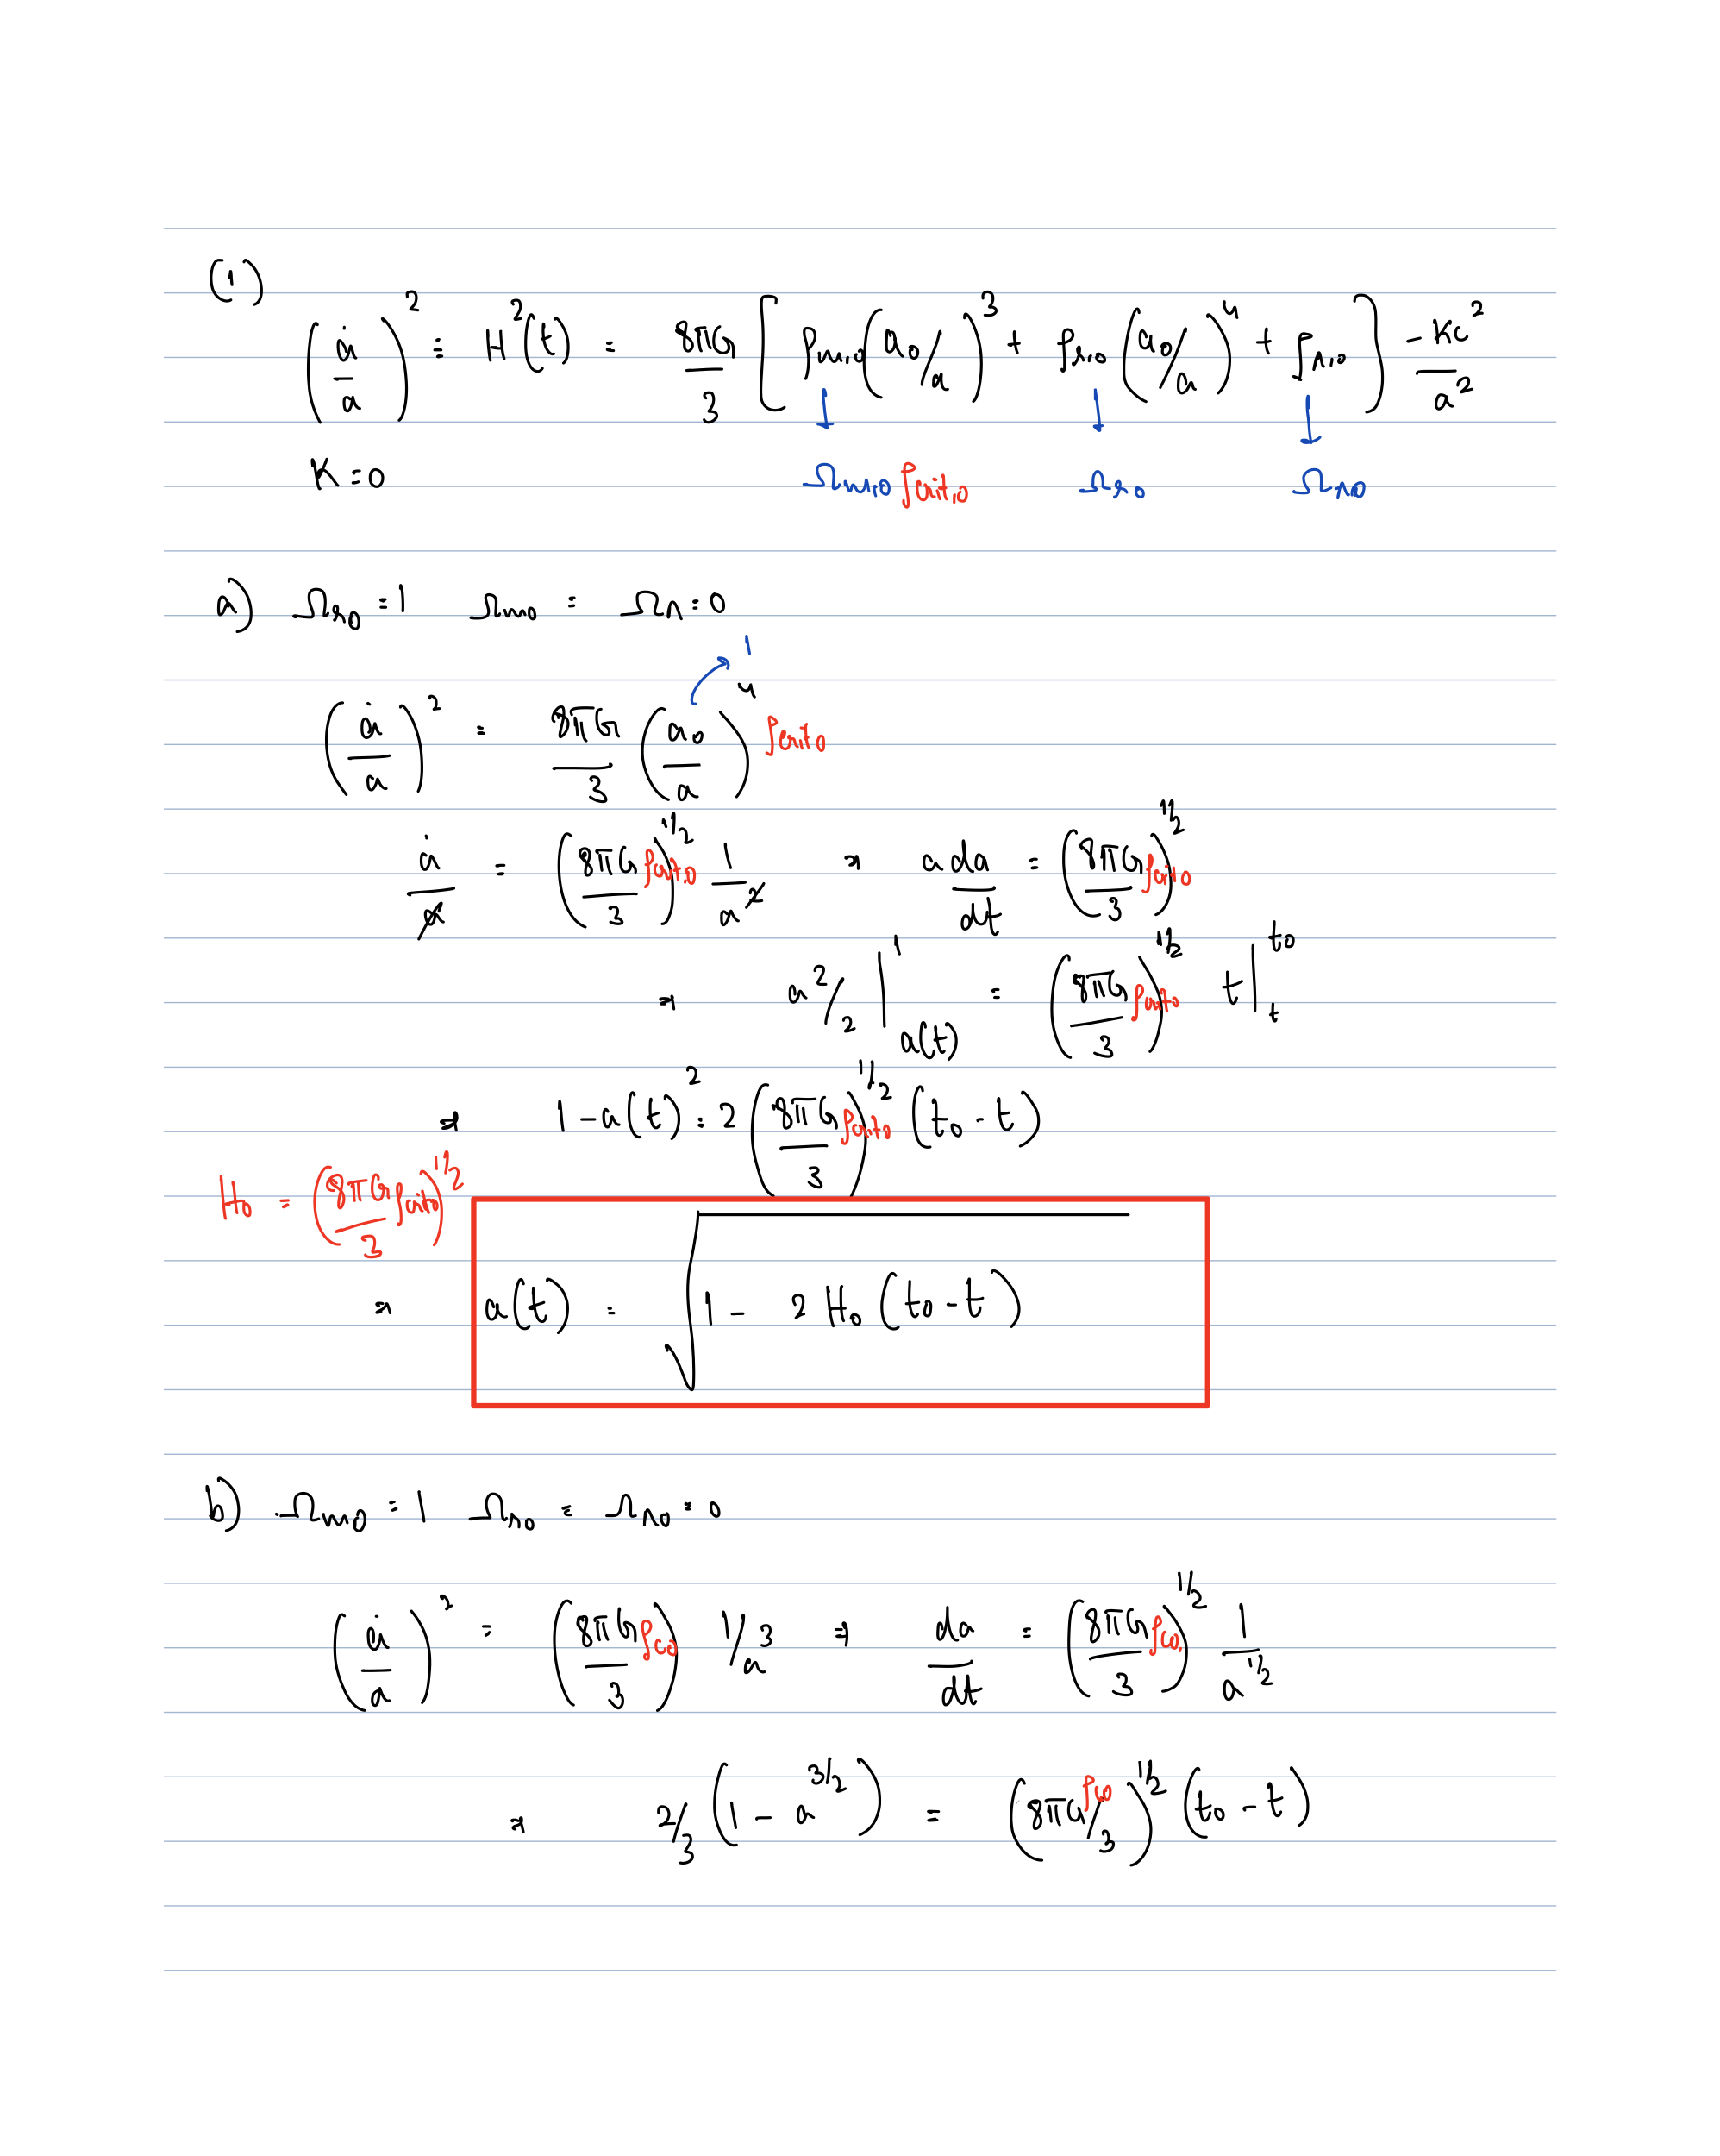
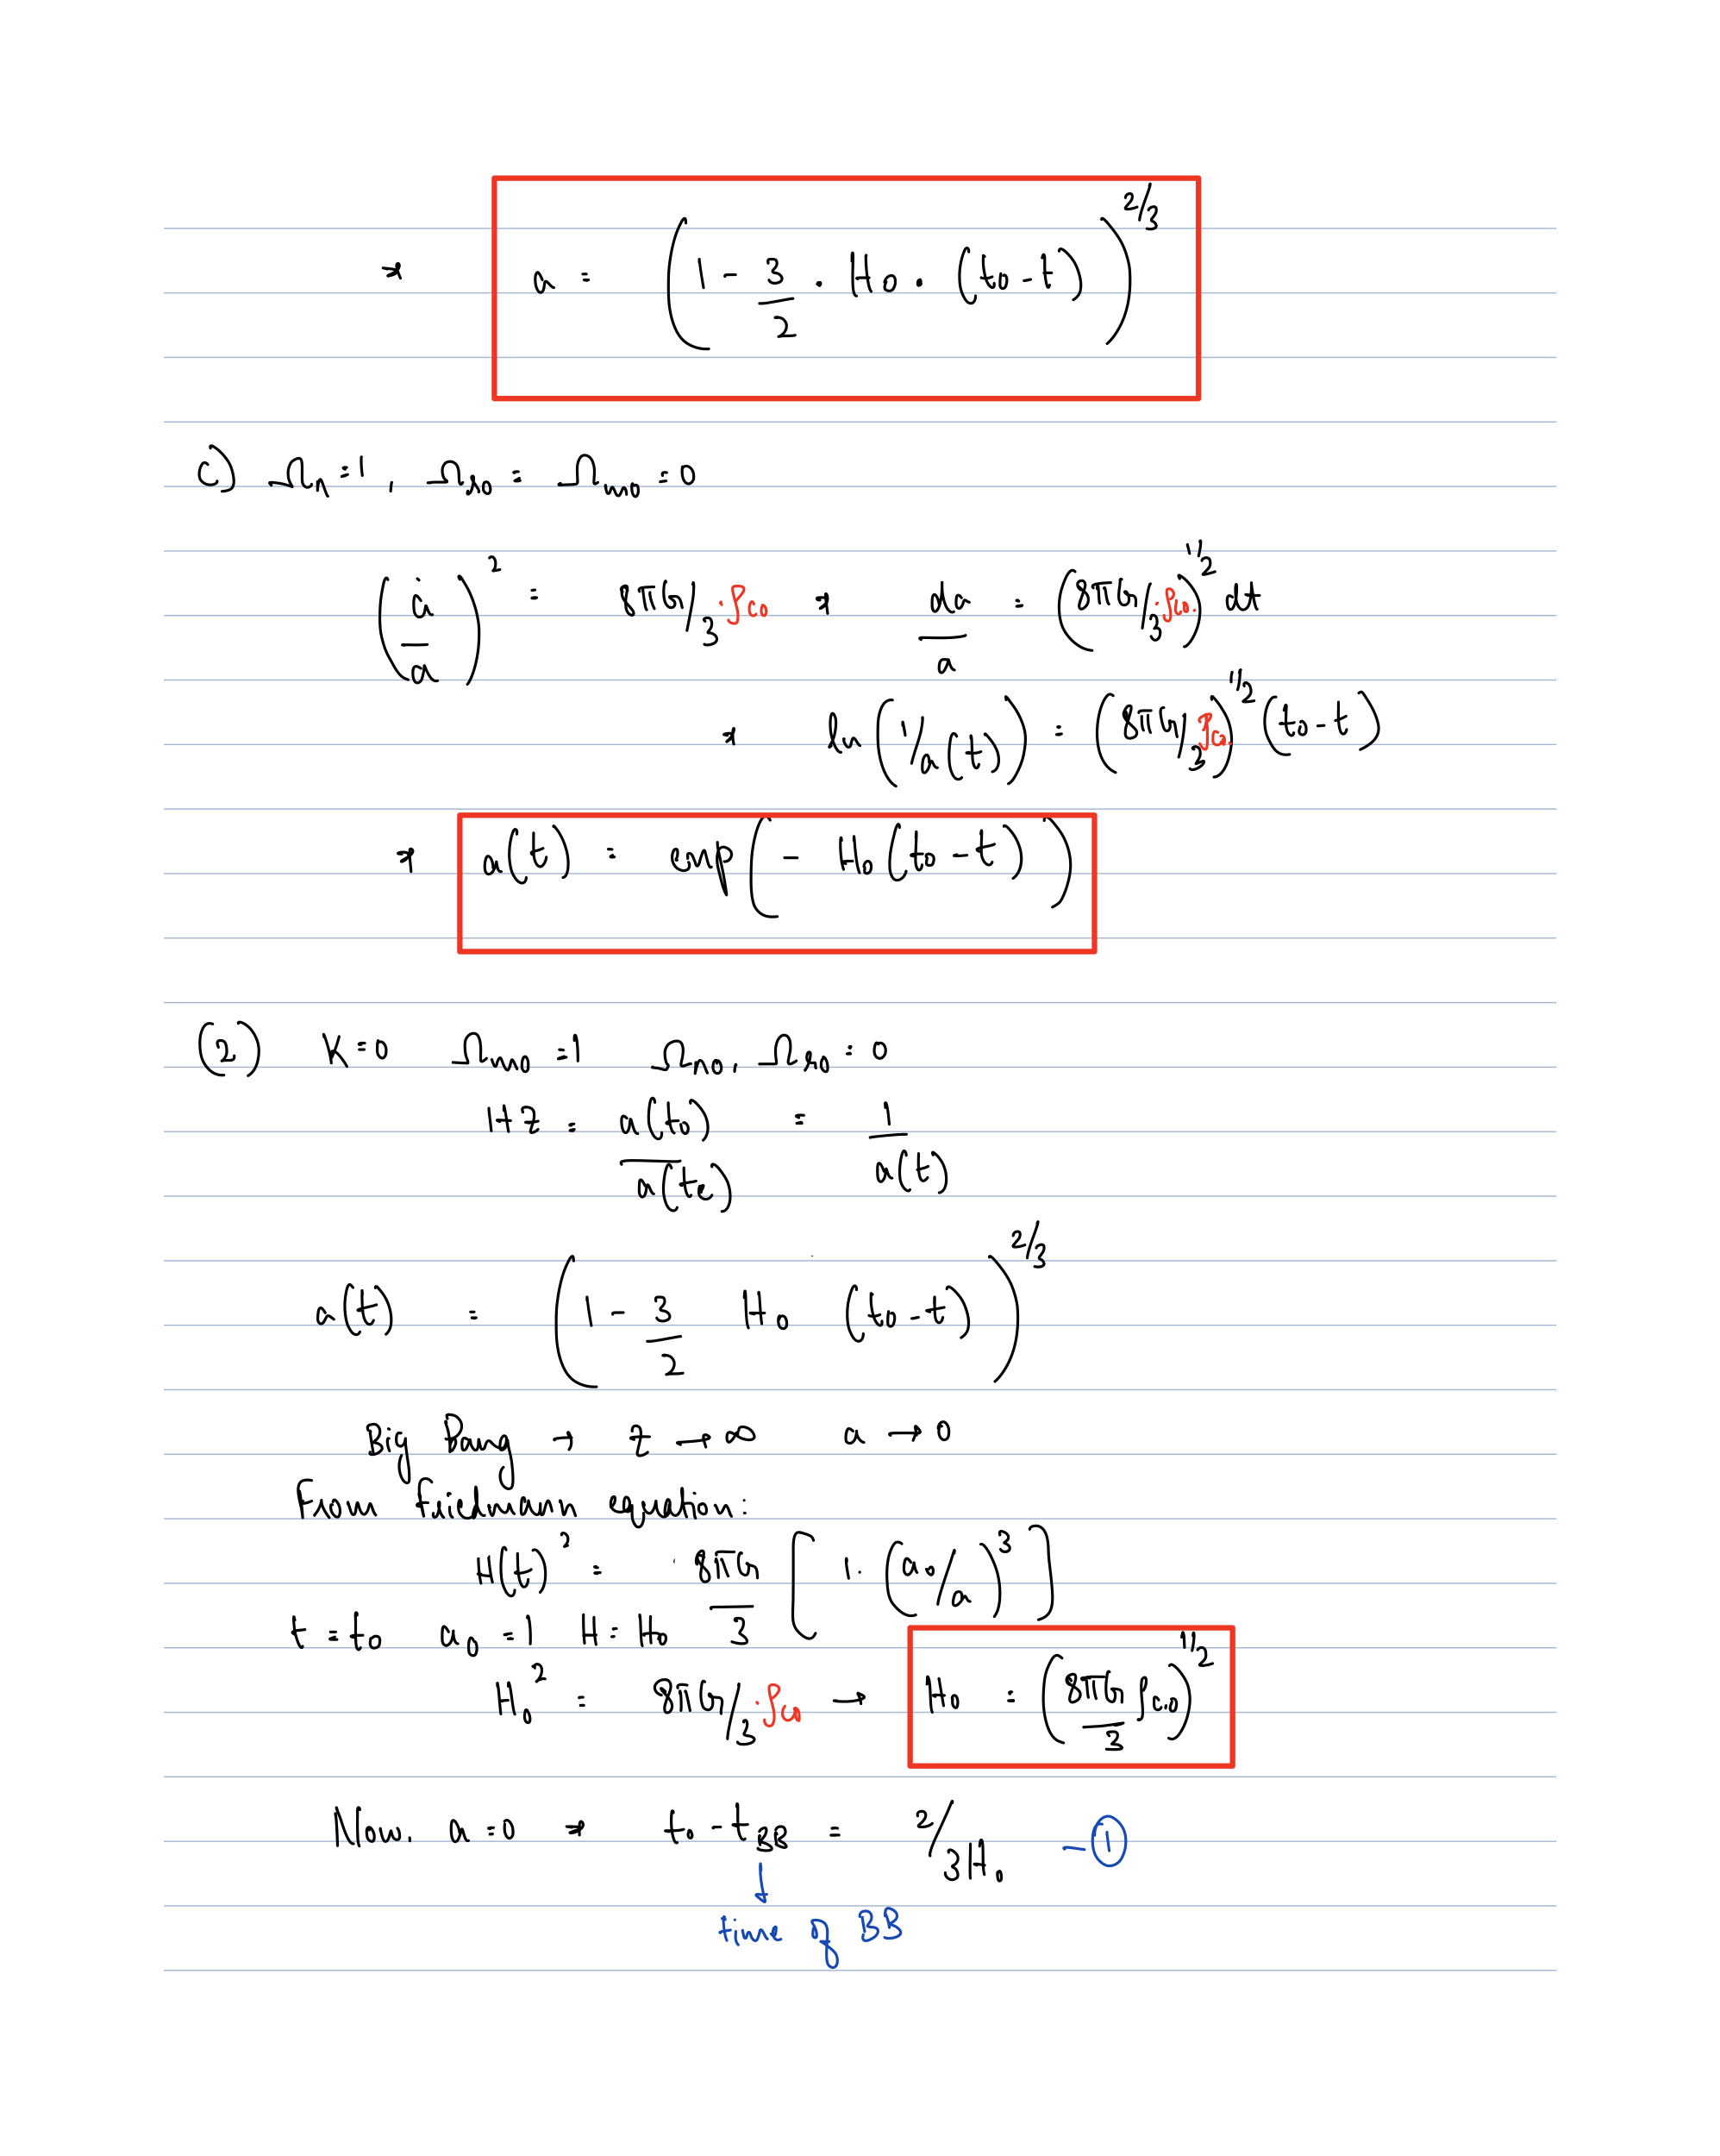
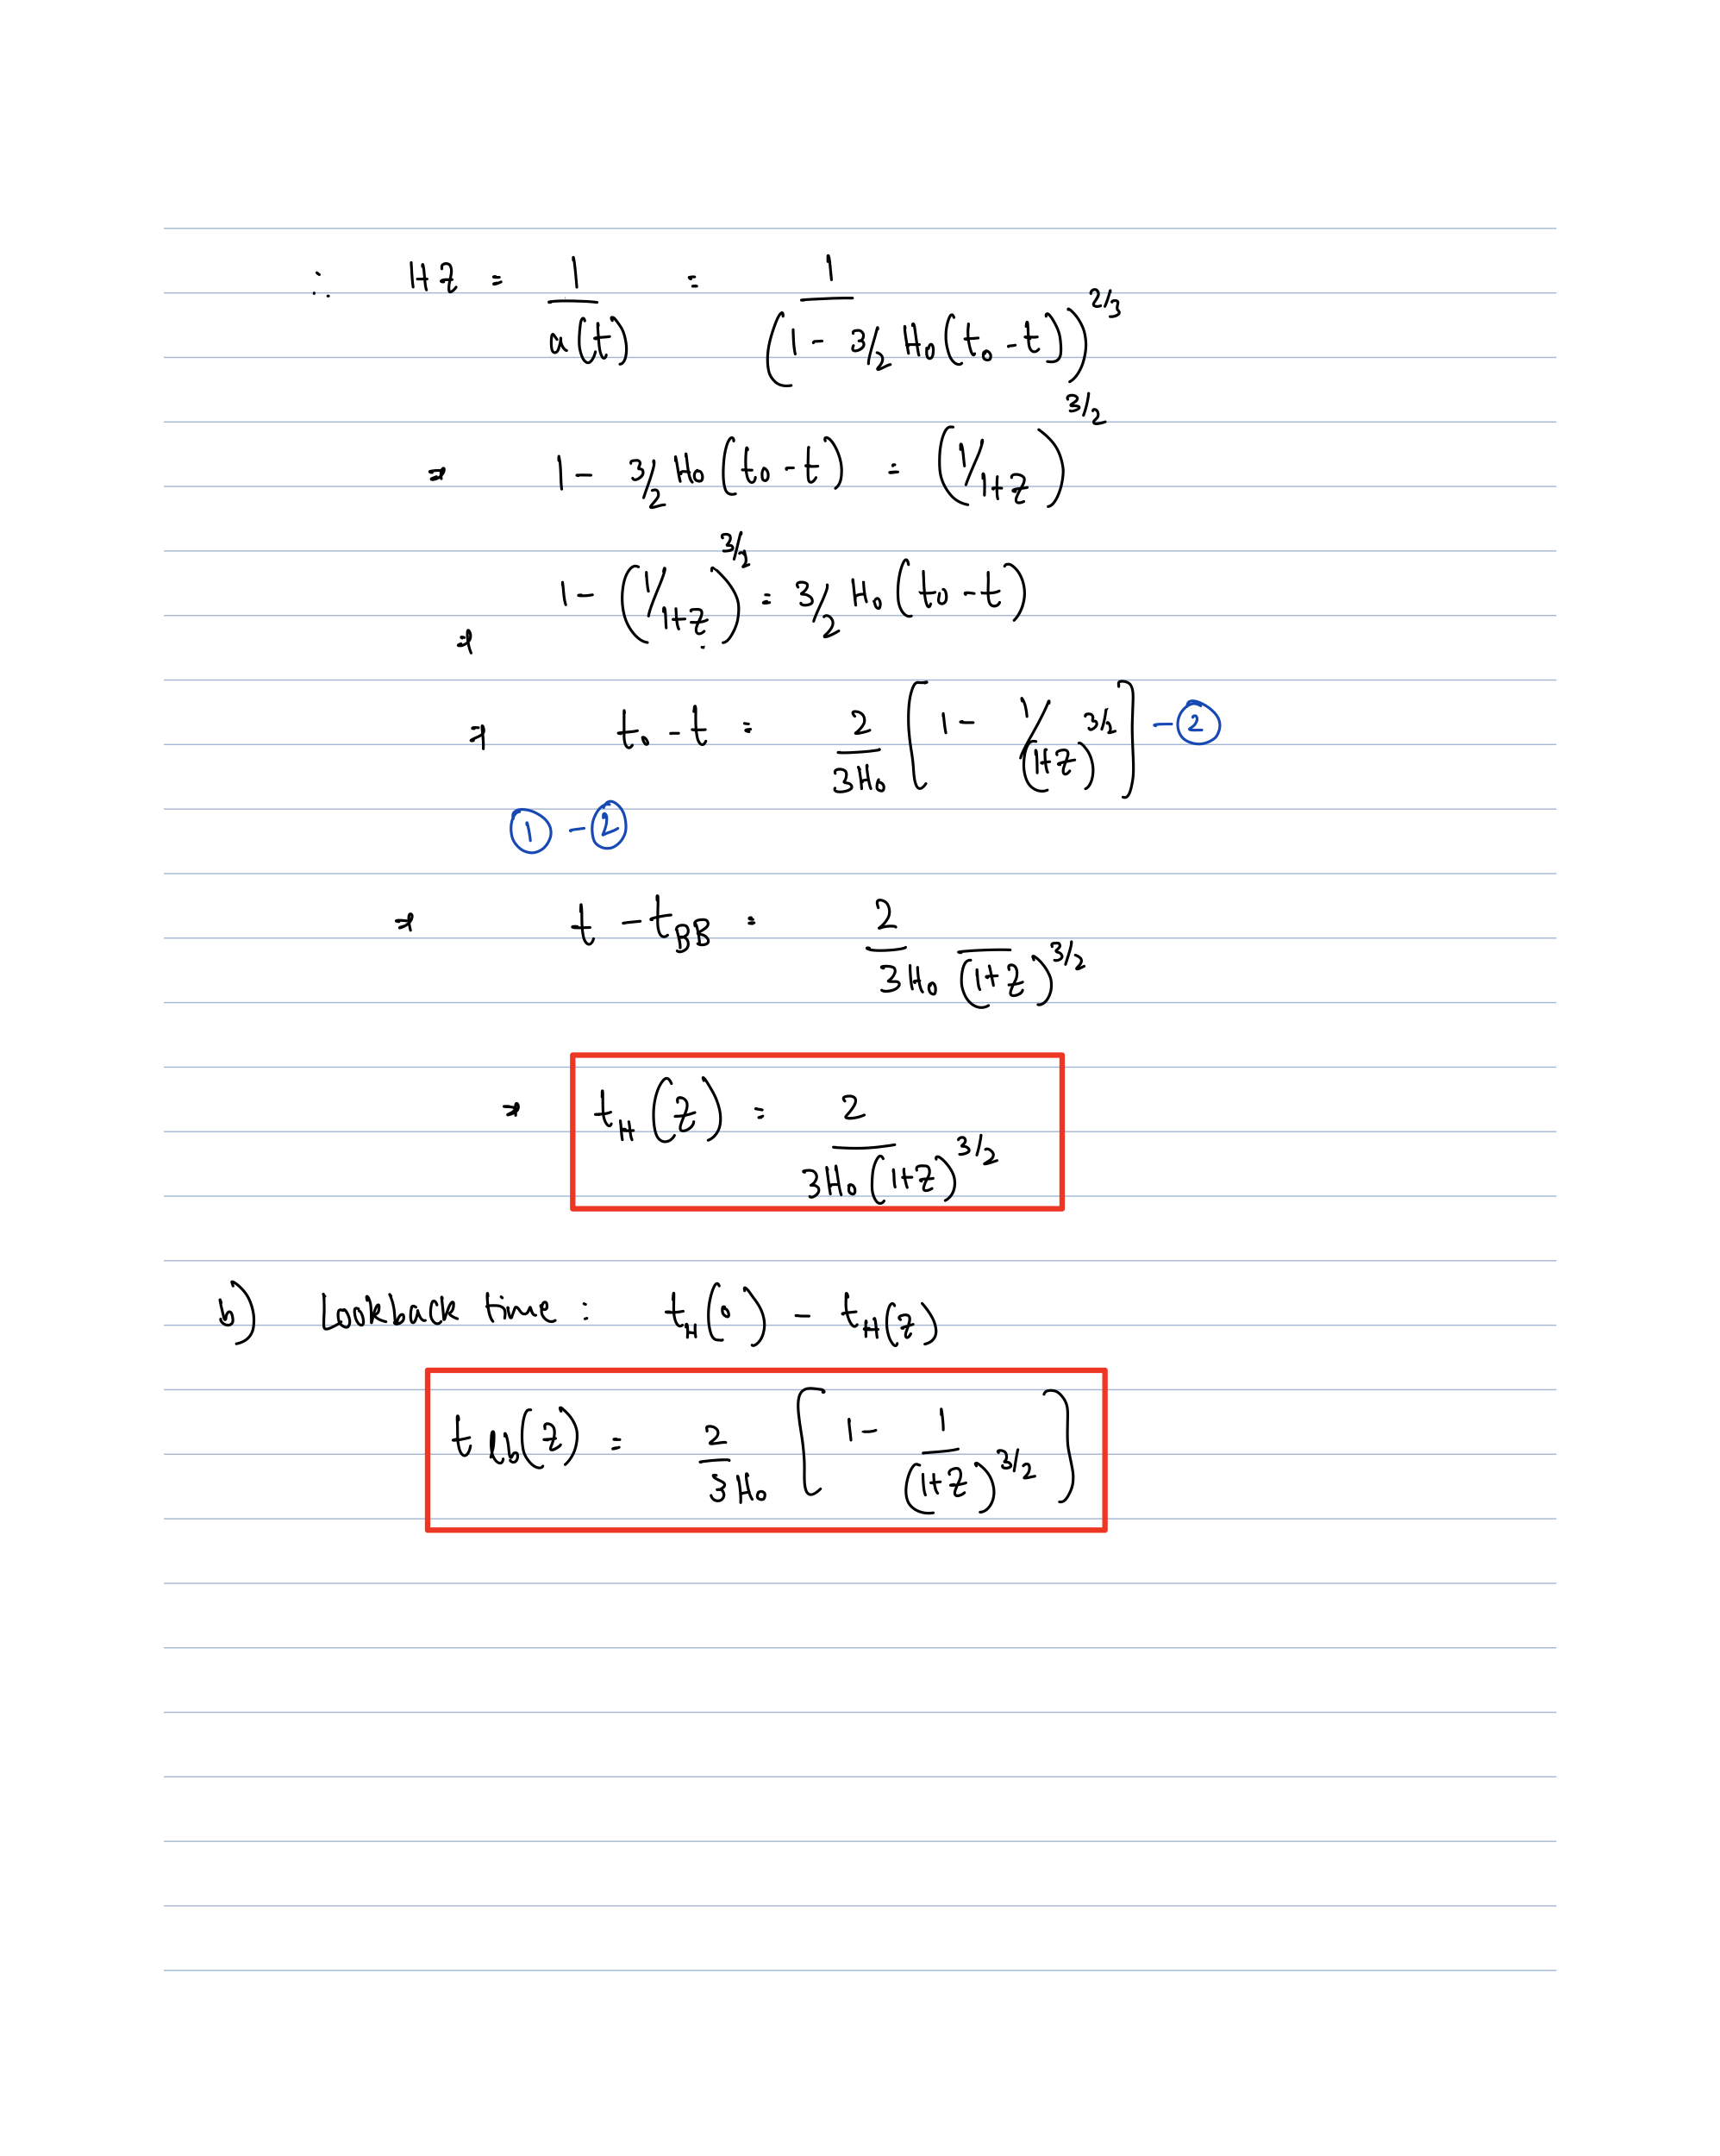
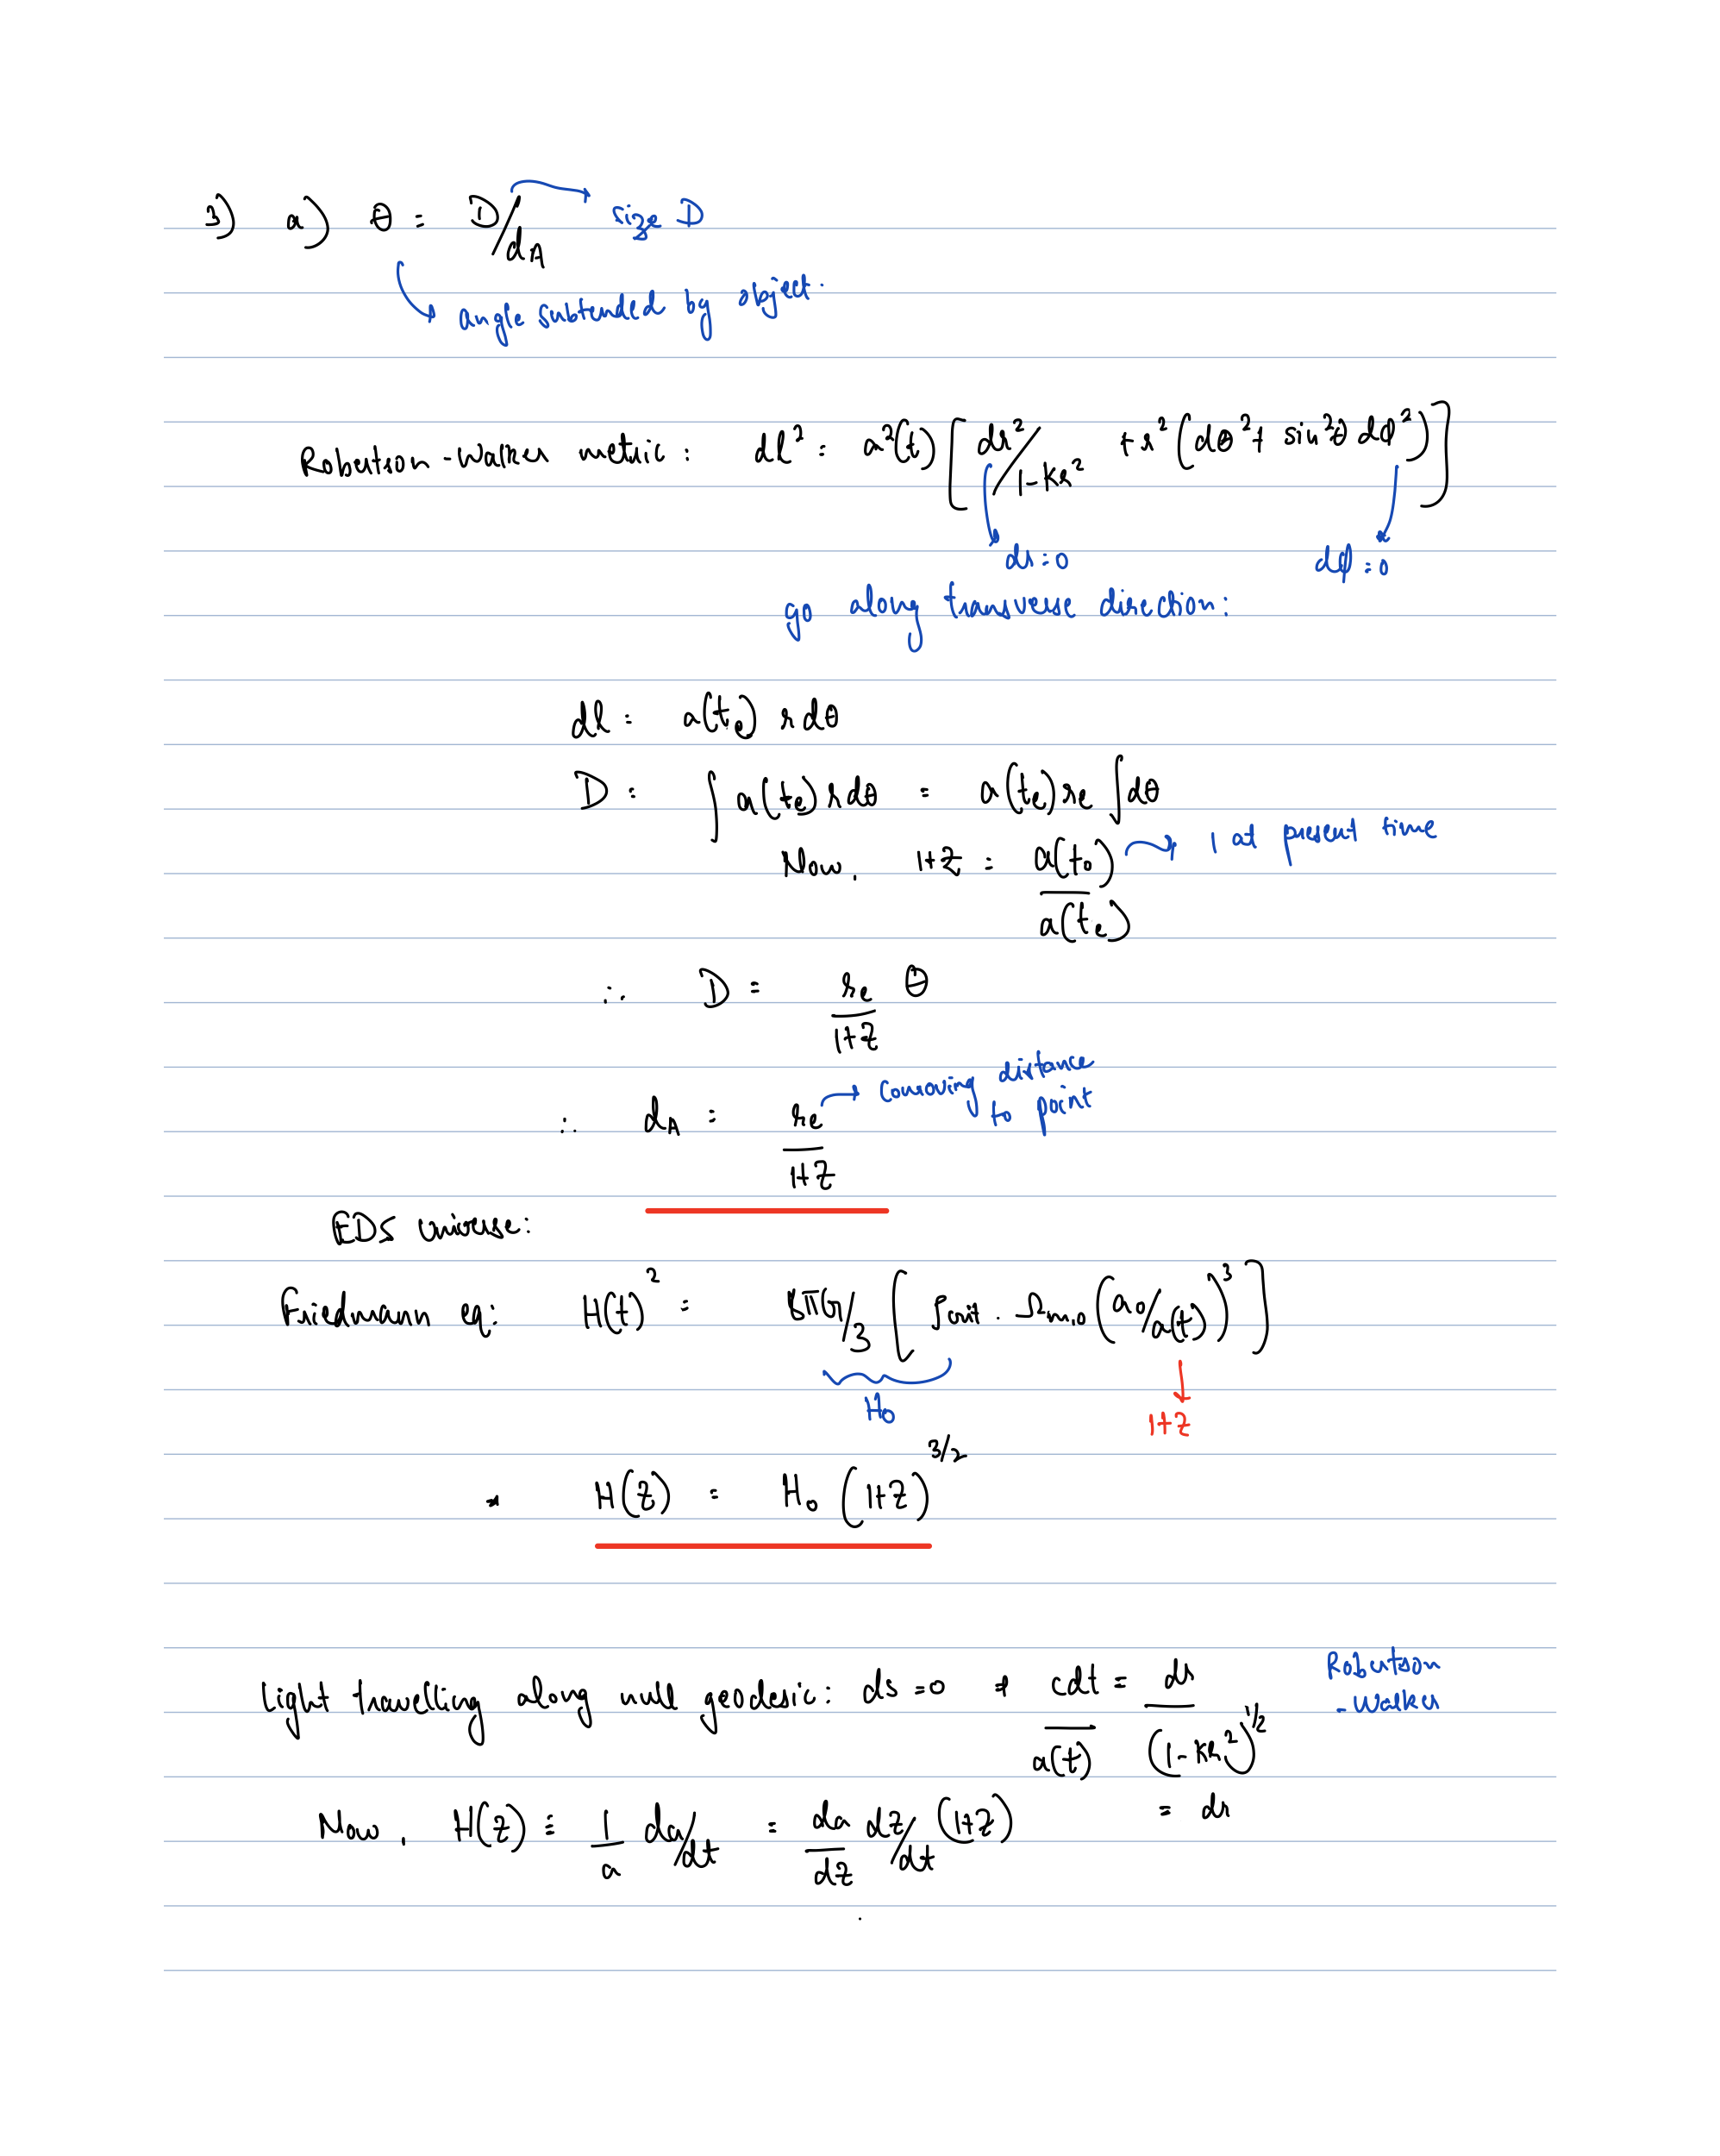
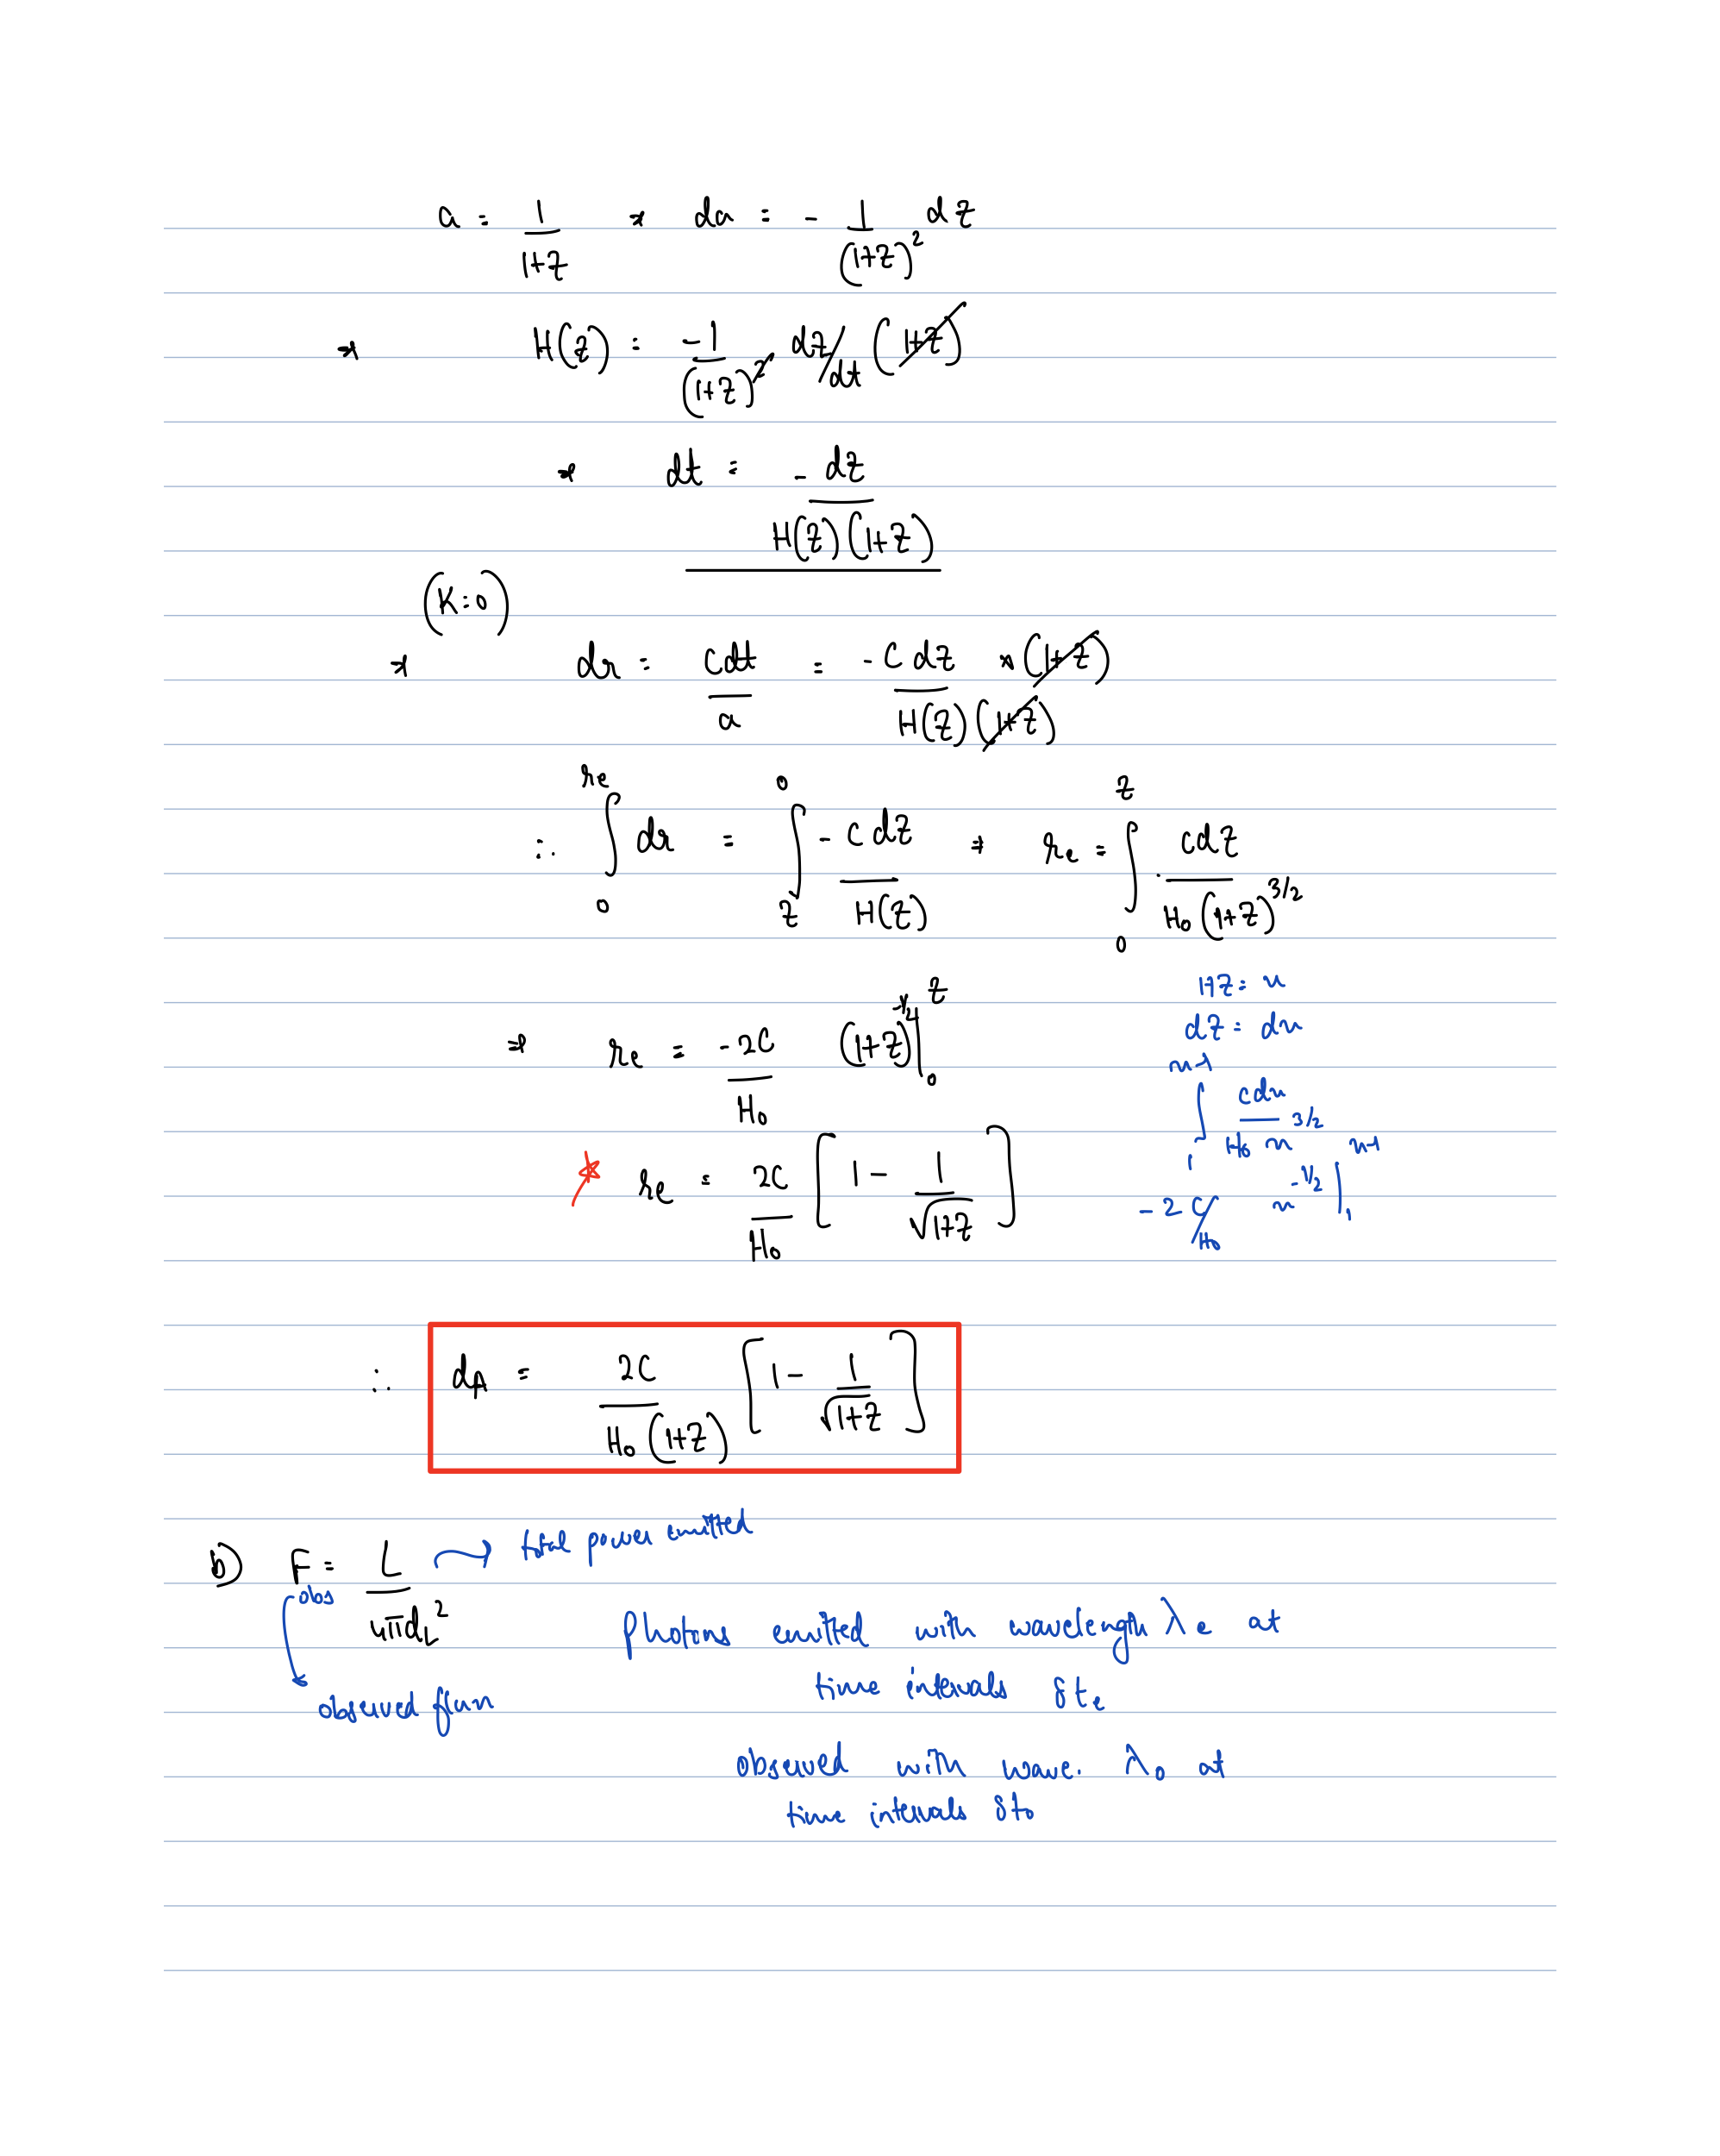
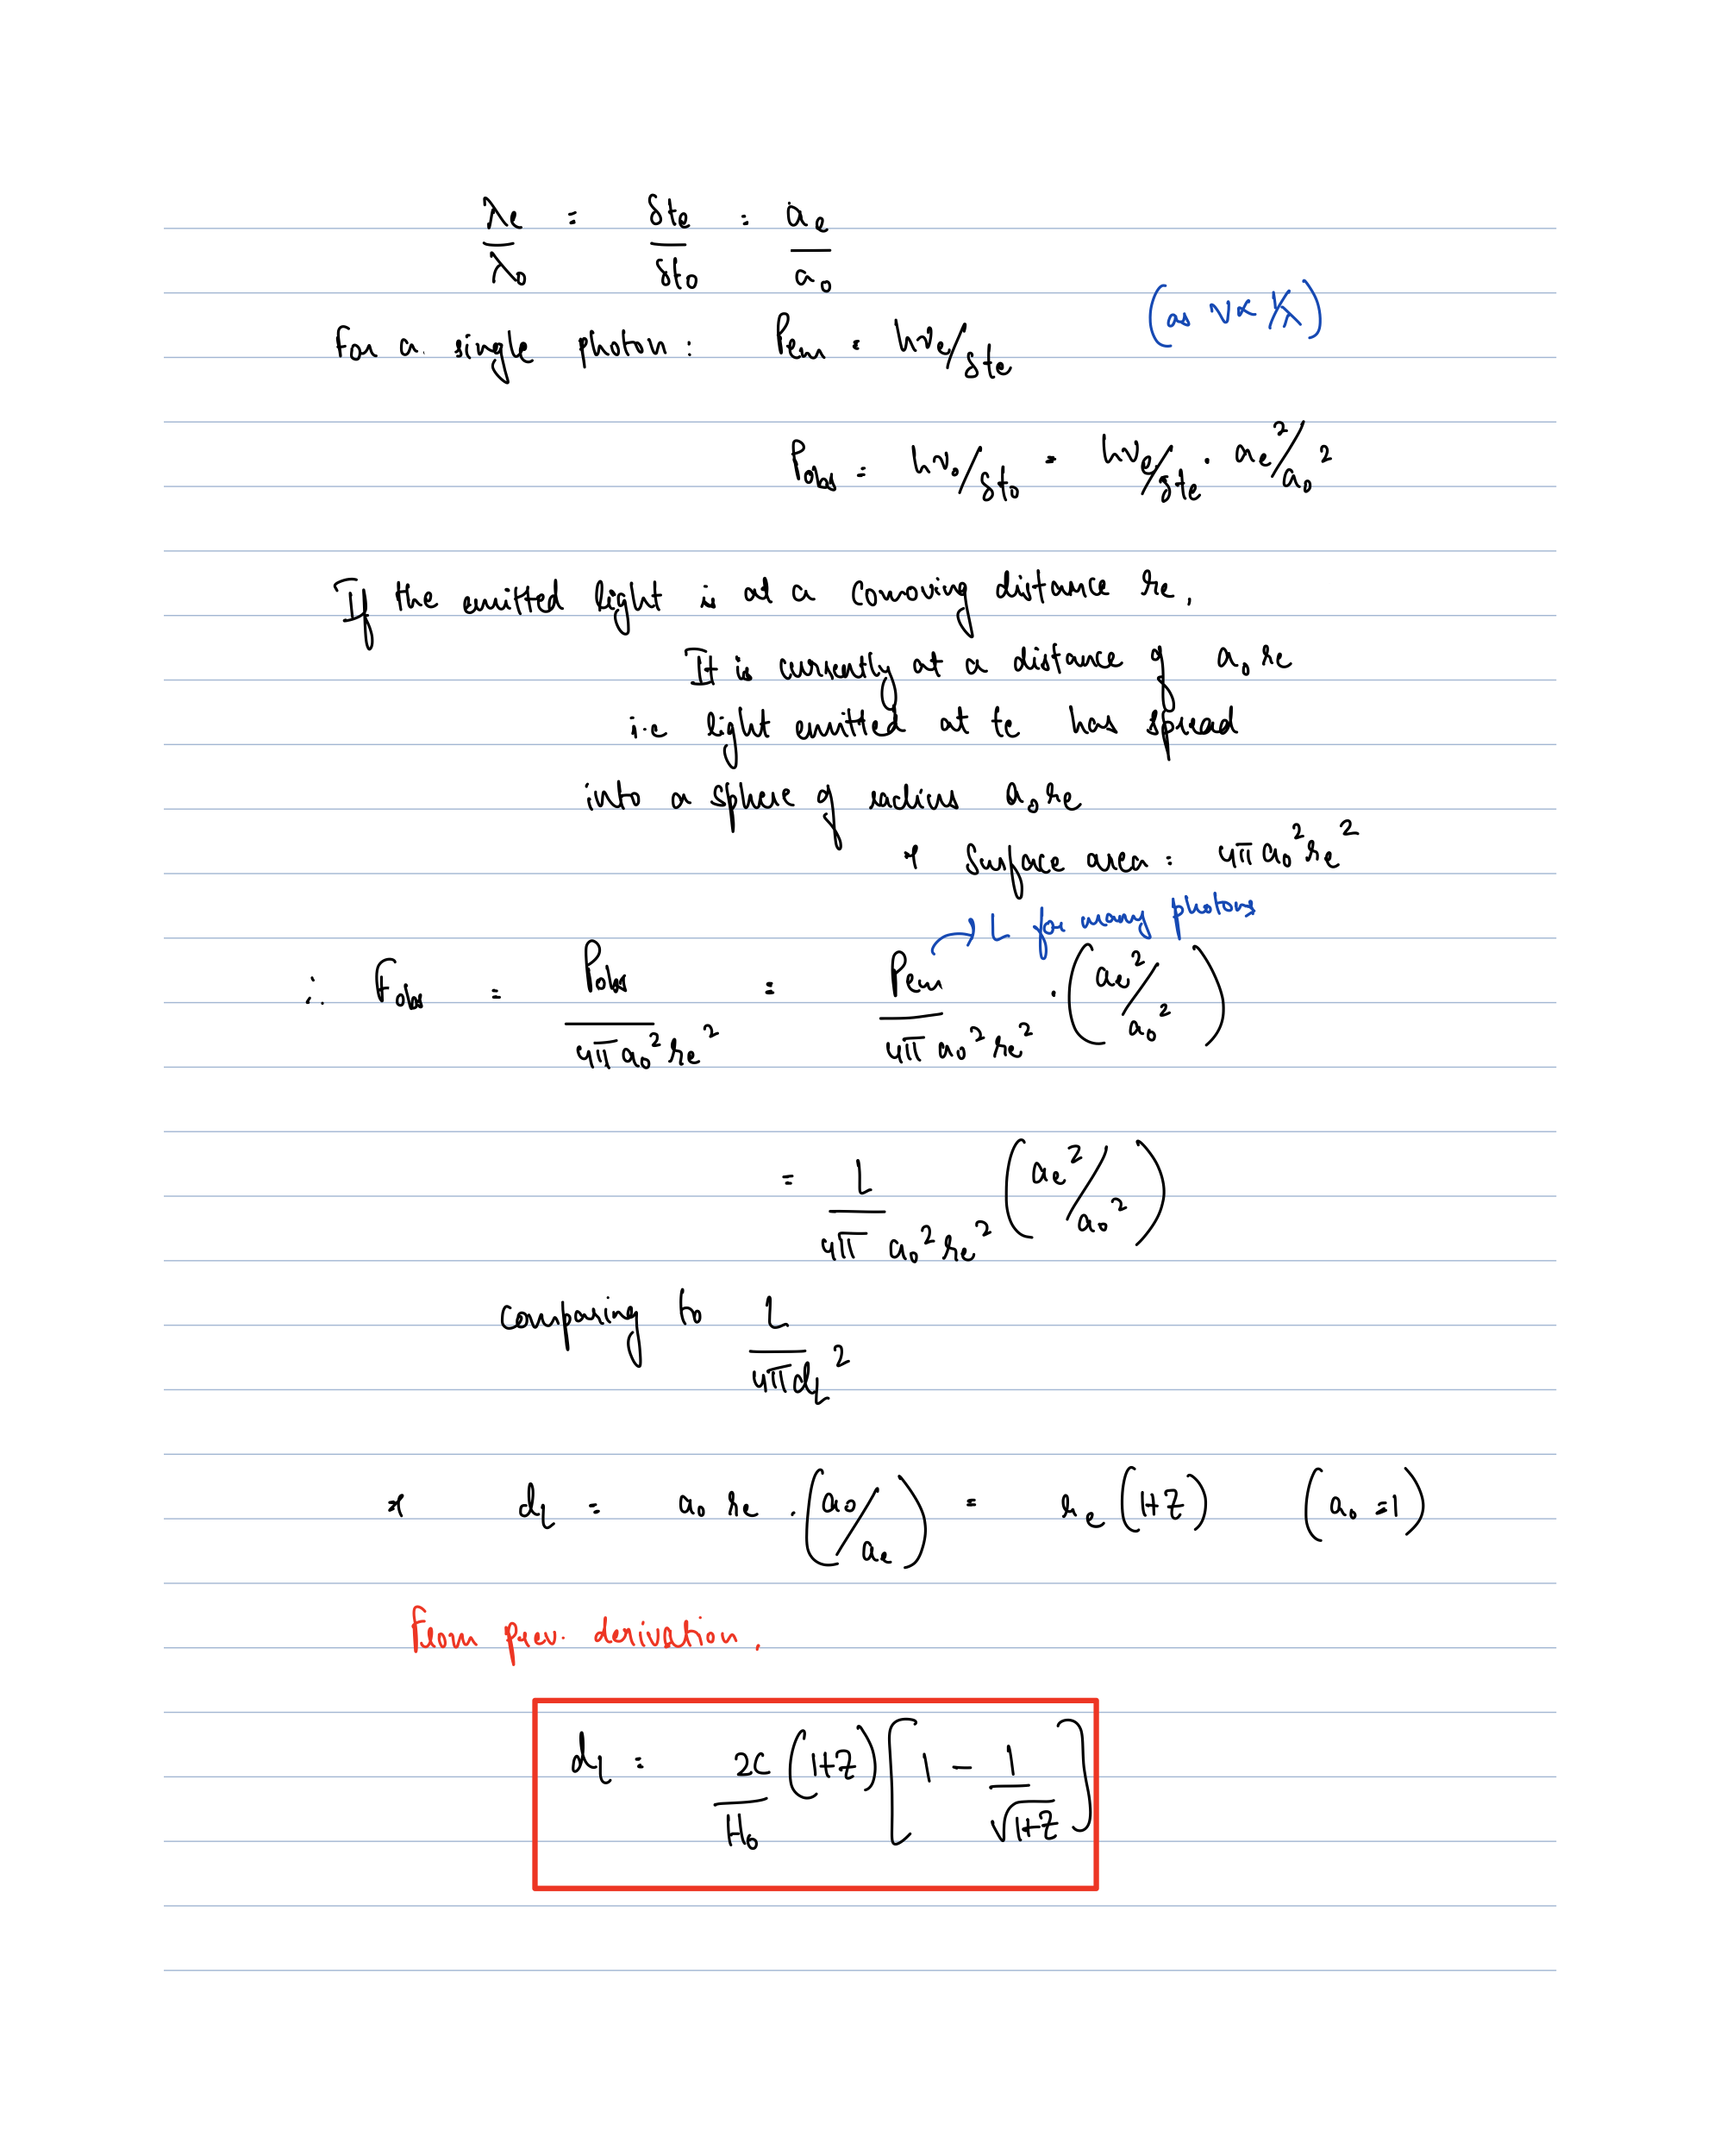

In [1]:
from headers import *

In [9]:
#For an Eintein de Sitter universe
def get_age(H0, z):
    '''H0 in km/s/Mpc'''
    H0 = H0* u.km / u.s / u.Mpc
    age = 2/(3*H0*(1+z)**1.5)
    return age.to(u.Gyr).value

def get_lb(H0,z):
    '''H0 in km/s/Mpc'''
    H0 = H0* u.km / u.s / u.Mpc
    lb = (2/(3*H0))*(1-1/(1+z)**1.5)
    return lb.to(u.Gyr).value

#Hubble's constant in km/s/Mpc
H0 = [50.0, 70.0, 100.0]

#Redshift
z = 2

for h in H0:
    print('For H0 = %d km/s/Mpc'%h)
    print('Age at z = %d is %.2f Gyr'%(z, get_age(h,z)))
    print('Lookback time at z = %d is %.2f Gyr'%(z, get_lb(h,z)))
    print()


For H0 = 50 km/s/Mpc
Age at z = 2 is 2.51 Gyr
Lookback time at z = 2 is 10.53 Gyr

For H0 = 70 km/s/Mpc
Age at z = 2 is 1.79 Gyr
Lookback time at z = 2 is 7.52 Gyr

For H0 = 100 km/s/Mpc
Age at z = 2 is 1.25 Gyr
Lookback time at z = 2 is 5.26 Gyr




__Problem 3.__ (20 points)

For the Einstein - de Sitter universe, derive __explicit analytical__ dependence on $z$ and $H_0$ for:

__a.__ The angular-diameter distance $d_A(z)$ at redshift $z$

__b.__ The luminosity distance $d_L(z)$ to redshift $z$.


__Problem 4.__ (40 points)

Write code to numerically calculate $t_H(z)$ and $d_A(z)$ for an arbitrary choice of $\Omega_{m0}\,$, $\Omega_\Lambda\,$, $H_0$ in a flat universe. You may use standard numerical routines from `scipy.integrate`.

__a.__ Make a plot of $t_H$ versus $z$ in the range $0 \le z \le 10$ for two cosmologies: $\Omega_{m0}=1$, $\Omega_\Lambda=0$, $H_0 = 50$; and $\Omega_{m0}=0.3$, $\Omega_\Lambda=0.7$, $H_0 = 70$. Put both lines on the same plot, using different style or color.

__b.__ On the same plot, add another line corresponding to your analytical solution from Problem 2. How does it compare with your numerical solution?

__c.__ Make another plot, repeating steps __a__ and __b__ for $d_A(z)$, adding your analytical solution from Problem 3.

__d.__ Make a third plot of the three energy densities $\rho(a)$ for non-relativistic matter, relativistic matter, and dark energy. Use a log-log scale and indicate the ranges of the expansion factor $a$ where each of the three types dominates over the others. Take the current values of the energy densities at $a=1$ from Table 2 of the Planck 2018 results paper. 


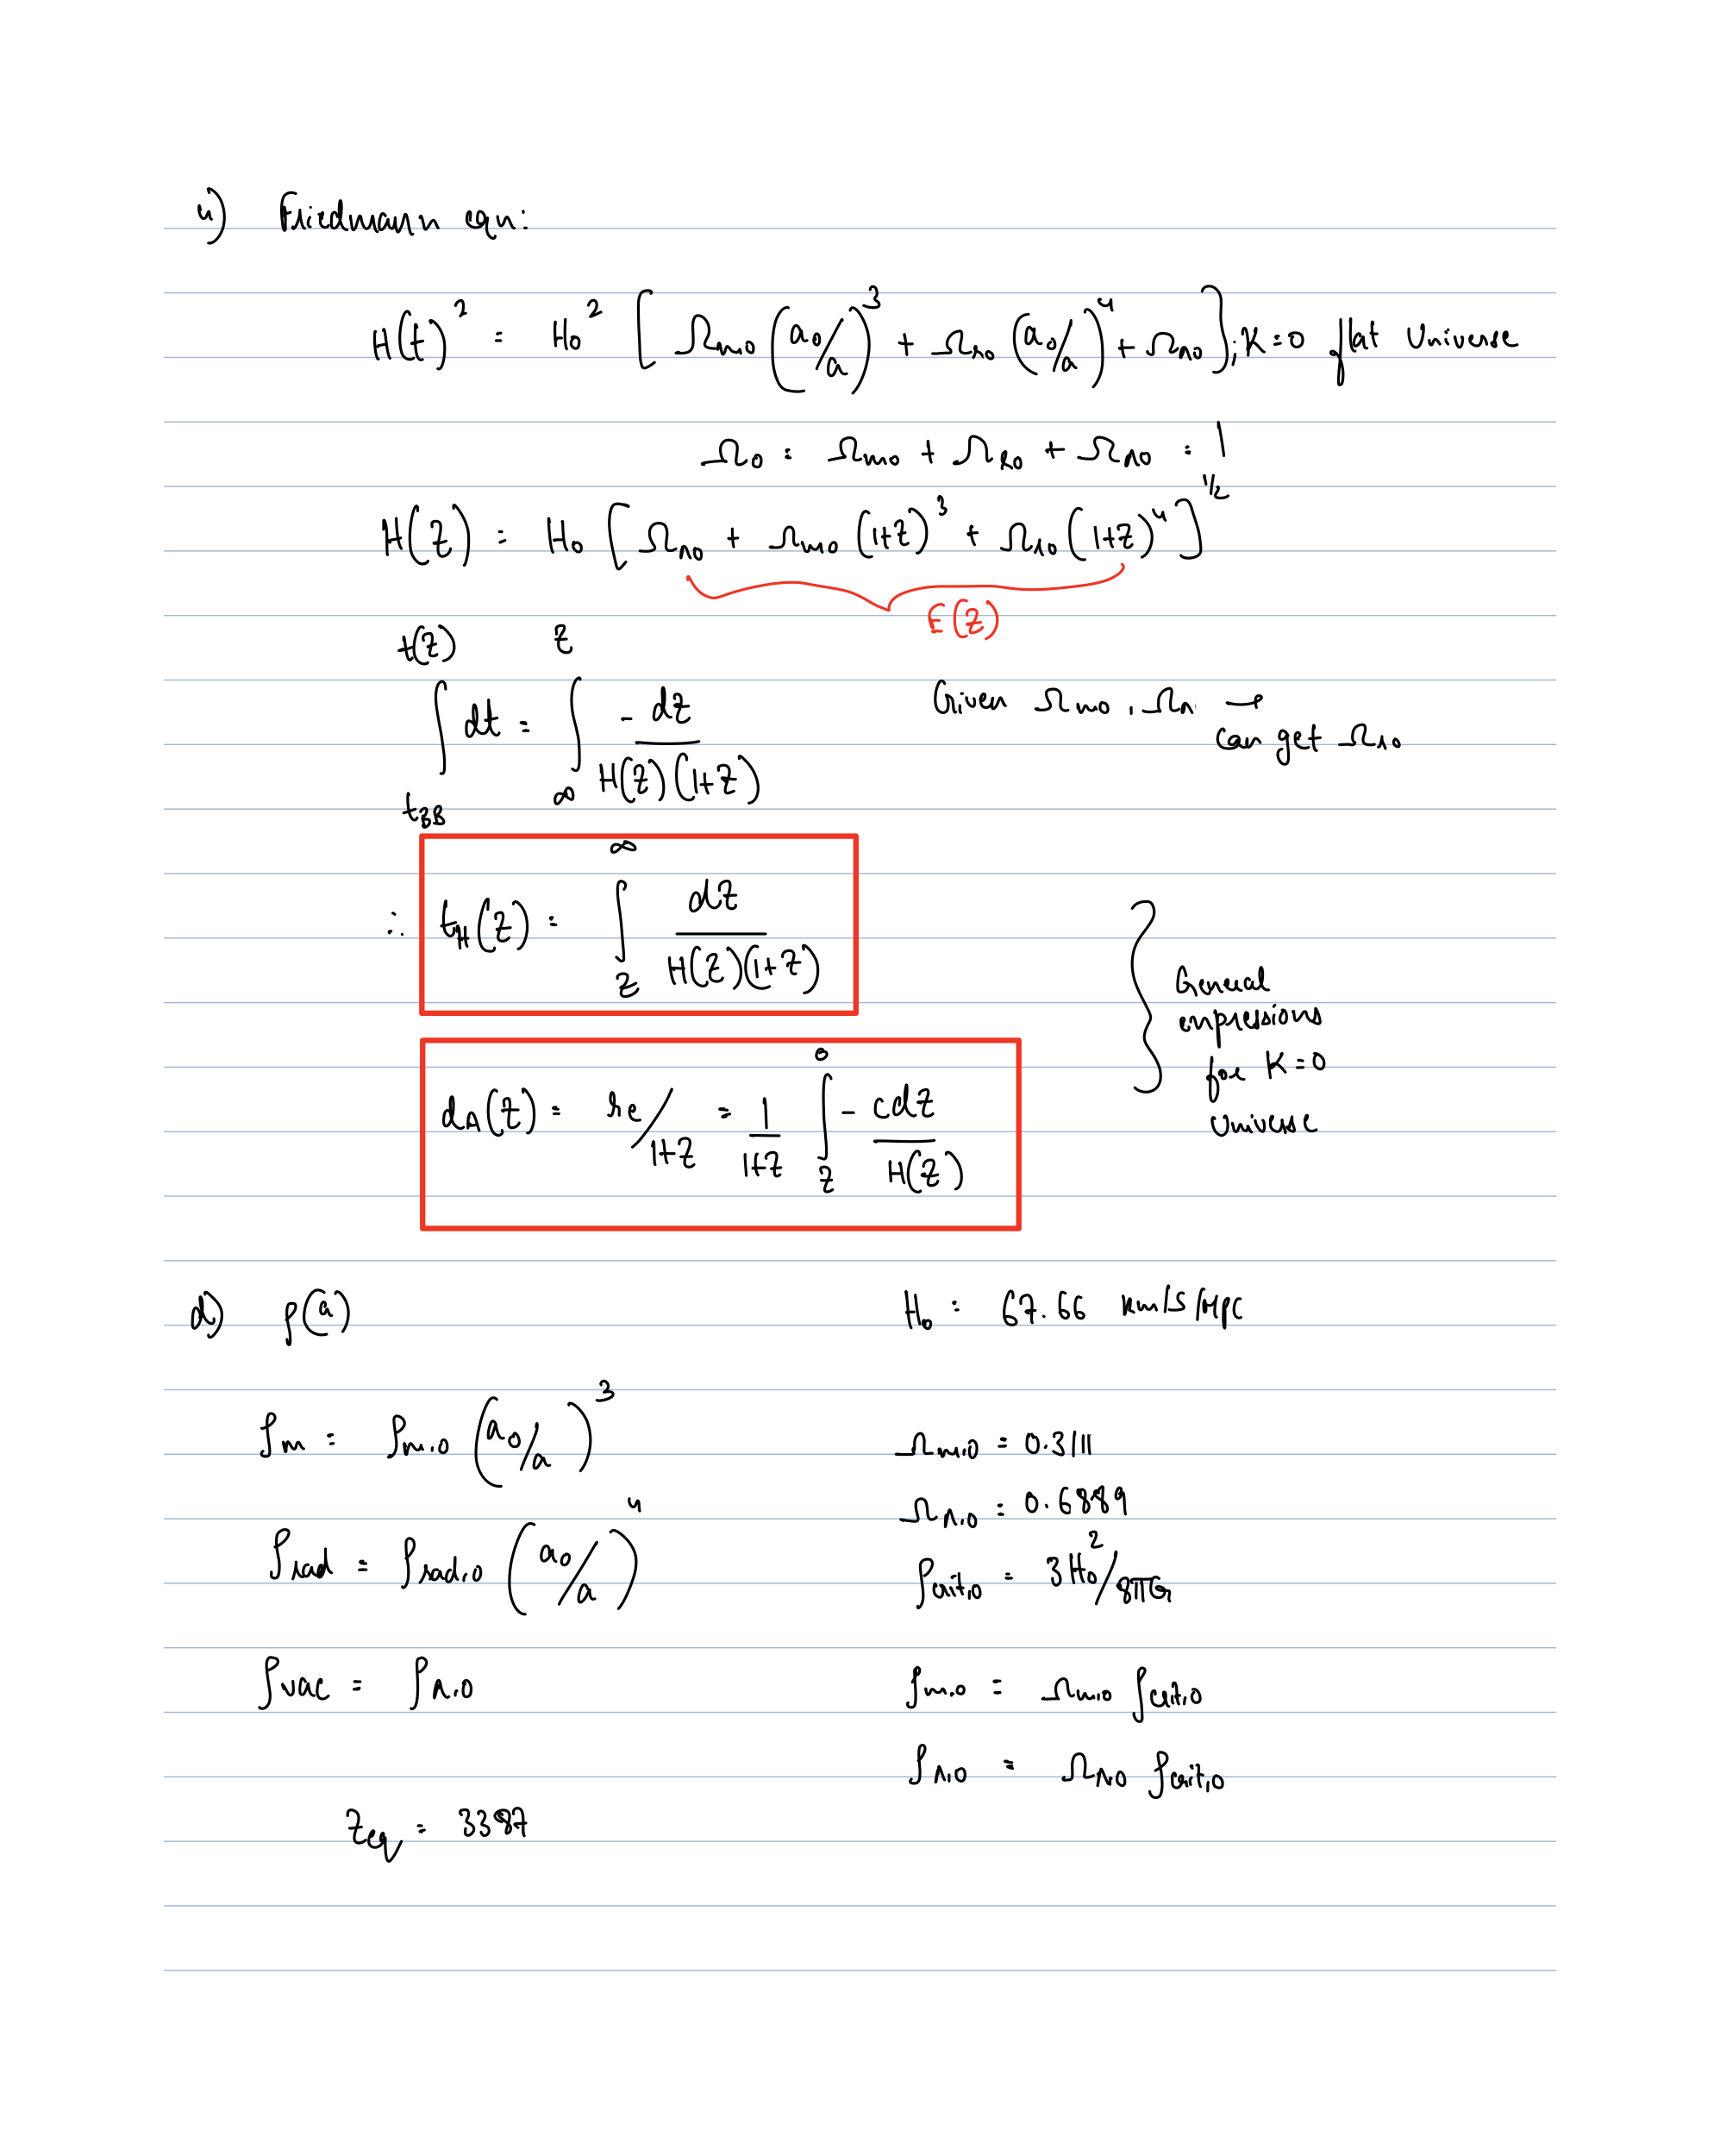
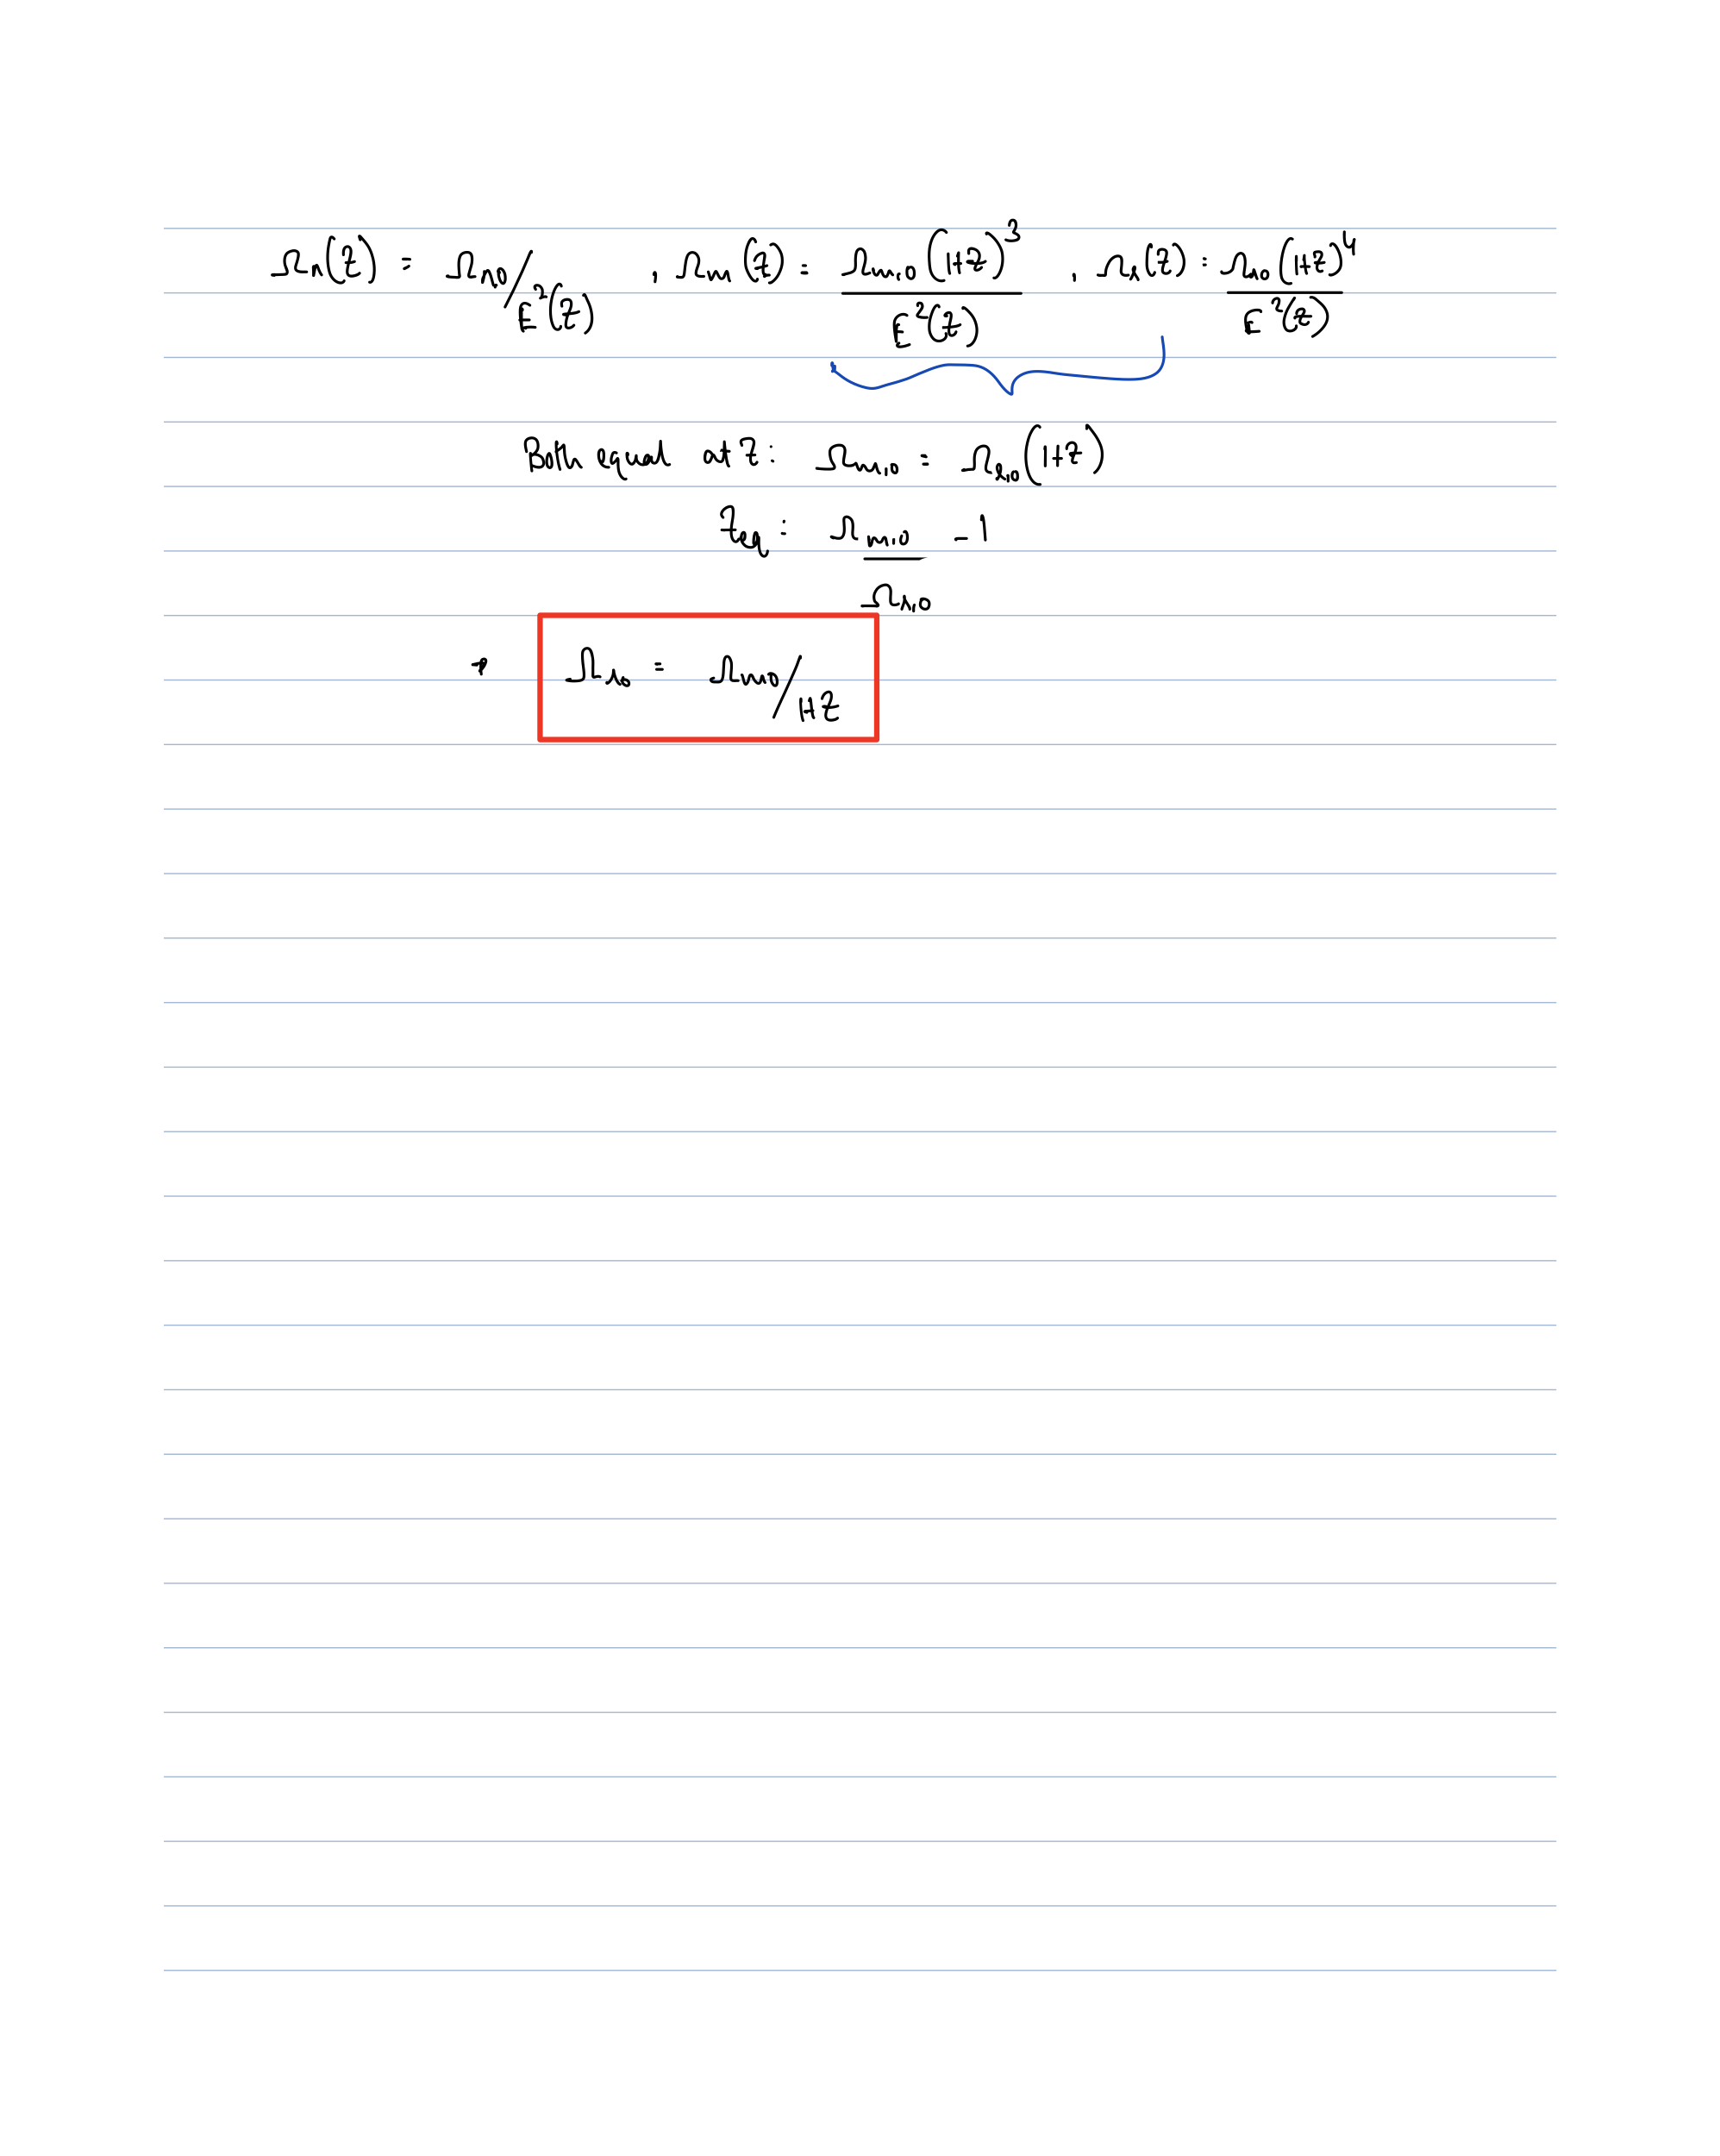

In [10]:
#scipy.integrate import
from scipy.integrate import quad
import astropy.constants as const

In [21]:
#Hubble's parameter as a function of redshift:
def H(z, Omega_m, Omega_l, H0):
    return H0*np.sqrt(Omega_m*(1+z)**3 + Omega_l + (1-Omega_m-Omega_l)*(1+z)**4)

def age_integrand(z, Omega_m, Omega_l, H0):
    return 1/((1+z)*H(z, Omega_m, Omega_l, H0))

def get_age(z, Omega_m, Omega_l, H0):
    '''H0 in km/s/Mpc
    Omega_m: matter density
    Omega_l: dark energy density
    Flat Universe,
    returns age in Gyr'''
    age, _ = quad(age_integrand, z, np.inf, args=(Omega_m, Omega_l, H0))
    age = age * u.Mpc *u.s / u.km
    return age.to(u.Gyr).value

def ang_dist_integrand(z, Omega_m, Omega_l, H0):
    return 1/H(z, Omega_m, Omega_l, H0)

def get_ang_dist(z, Omega_m, Omega_l, H0):
    '''H0 in km/s/Mpc
    Omega_m: matter density
    Omega_l: dark energy density
    Flat Universe,
    returns angular diameter distance in Mpc'''
    temp, _ = quad(ang_dist_integrand, 0, z, args=(Omega_m, Omega_l, H0))
    temp = temp * u.Mpc * u.s / u.km
    ang_dist = const.c * temp/(1+z)
    return ang_dist.to(u.Mpc).value

def analytical_age(z, H0):
    '''H0 in km/s/Mpc
    Omega_m: 1
    Omega_l: 0
    Flat Universe,
    returns age in Gyr'''
    age = 2/(3*H0*(1+z)**1.5)
    age = age * u.Mpc *u.s / u.km
    return age.to(u.Gyr).value

def analytical_dist(z, H0):
    '''H0 in km/s/Mpc
    Omega_m: 1
    Omega_l: 0
    Flat Universe,
    returns angular diameter distance in Mpc'''
    H0 = H0* u.km / u.s / u.Mpc
    ang_dist = (2*const.c/(H0*(1+z))*(1-1/(1+z)**0.5))
    return ang_dist.to(u.Mpc).value

## Problem 4: Part a, b. c)

In [22]:
#Redshifts
z = np.linspace(0, 10, 100)

#Comso 1:
Omega_m1 = 1
Omega_l1 = 0
H0_1 = 50
age1 = [get_age(zi, Omega_m1, Omega_l1, H0_1) for zi in z]
analytical_age1 = [analytical_age(zi, H0_1) for zi in z]
ang_dist1 = [get_ang_dist(zi, Omega_m1, Omega_l1, H0_1) for zi in z]
analytical_dist1 = [analytical_dist(zi, H0_1) for zi in z]

#Comso 2:
Omega_m2 = 0.3
Omega_l2 = 0.7
H0_2 = 70
age2 = [get_age(zi, Omega_m2, Omega_l2, H0_2) for zi in z]
ang_dist2 = [get_ang_dist(zi, Omega_m2, Omega_l2, H0_2) for zi in z]

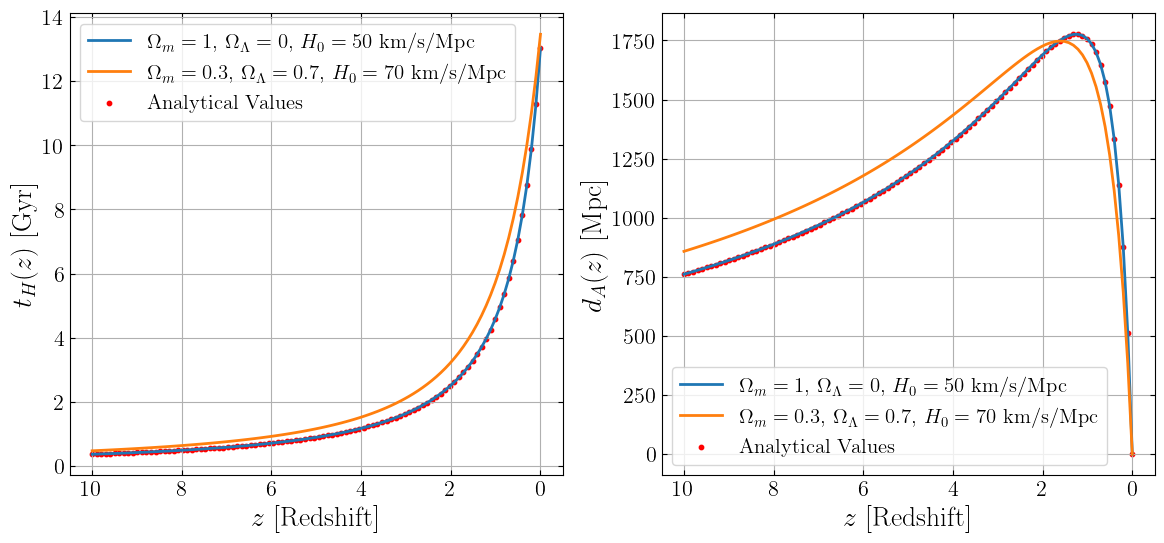

In [27]:
#Plotting:

#2 column 1 row suplots
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121)
ax.plot(z, age1, label=r'$\Omega_m = 1$, $\Omega_\Lambda = 0$, $H_0 = 50$ km/s/Mpc', lw= 2)
ax.scatter(z, analytical_age1, label=r'Analytical Values', color='r', s=10)
ax.plot(z, age2, label=r'$\Omega_m = 0.3$, $\Omega_\Lambda = 0.7$, $H_0 = 70$ km/s/Mpc', lw= 2)
ax.set_xlabel(r'$z$ [Redshift]')
ax.set_ylabel(r'$t_H(z)$ [Gyr]')
ax.invert_xaxis()
ax.legend(fontsize=15)
#Show grid
ax.grid(True)

ax = fig.add_subplot(122)
ax.plot(z, ang_dist1, label=r'$\Omega_m = 1$, $\Omega_\Lambda = 0$, $H_0 = 50$ km/s/Mpc', lw= 2)
ax.scatter(z, analytical_dist1, label=r'Analytical Values', color='r', s=10)
ax.plot(z, ang_dist2, label=r'$\Omega_m = 0.3$, $\Omega_\Lambda = 0.7$, $H_0 = 70$ km/s/Mpc', lw= 2)
ax.set_xlabel(r'$z$ [Redshift]')
ax.set_ylabel(r'$d_A(z)$ [Mpc]')
ax.invert_xaxis()
ax.legend(fontsize=15)
ax.grid(True)

## Problem 4: Part d)

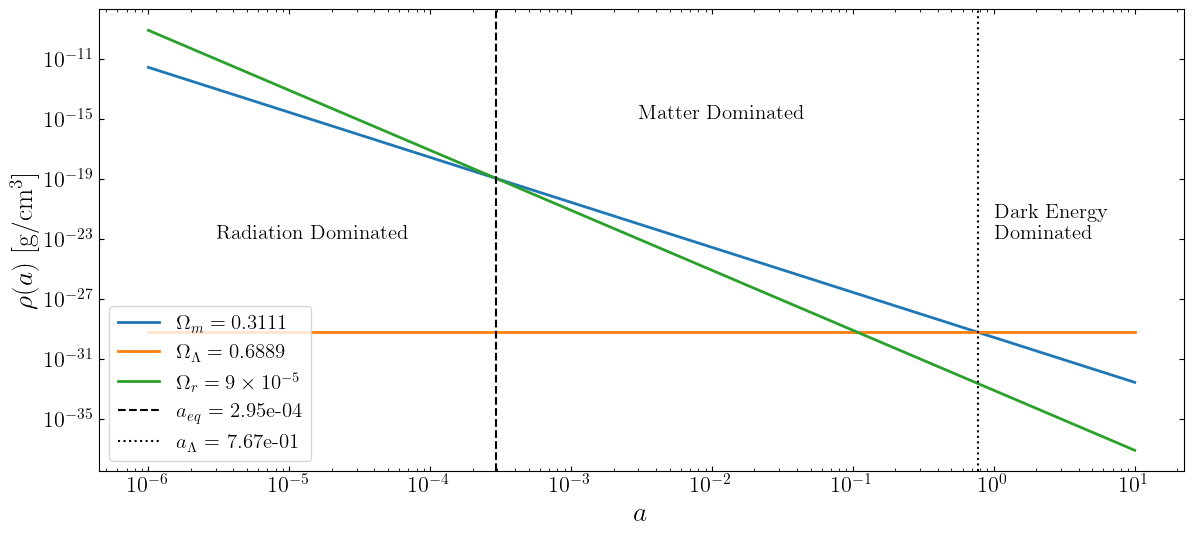

In [41]:
#Planck 2018 Table 2, last column:
H0 = 67.66 * u.km / u.s / u.Mpc
Omega_m0 = 0.3111
Omega_l0 = 0.6889
# Redshift at which radiation and matter densities are equal
z_eq = 3387
Omega_r0 = Omega_m0/(1+z_eq)

#Critical density
rho_crit = 3*H0**2/(8*np.pi*const.G)
rho_crit = rho_crit.to(u.g/u.cm**3).value

#Scale factors:
a = np.logspace(-6, 1, 100)

#Density parameters:
rho_m = Omega_m0 * rho_crit * a**-3
rho_l = Omega_l0 * rho_crit
rho_r = Omega_r0 * rho_crit * a**-4

#Find a at which radiation and matter densities are equal
a_eq = 1/(1+z_eq)

#Find a at which matter and dark energy densities are equal
a_l = (Omega_m0/Omega_l0)**(1/3)

#Plotting:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
ax.plot(a, rho_m, label=r'$\Omega_m = 0.3111$', lw= 2)
ax.plot(a, rho_l*np.ones_like(a), label=r'$\Omega_\Lambda = 0.6889$', lw= 2)
ax.plot(a, rho_r, label=r'$\Omega_r = 9\times 10^{-5}$', lw= 2)
ax.axvline(a_eq, color='k', ls='--', label=r'$a_{eq}$ = %.2e'%a_eq)
ax.axvline(a_l, color='k', ls='dotted', label=r'$a_{\Lambda}$ = %.2e'%a_l)
ax.text(3e-6, 1e-23, 'Radiation Dominated', fontsize=15)
ax.text(3e-3, 1e-15, 'Matter Dominated', fontsize=15)
ax.text(1, 1e-23, 'Dark Energy \n Dominated', fontsize=15)
#log-log
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$\rho(a)$ [g/cm$^3$]')
ax.legend(fontsize=15, loc='lower left')
